In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
df = pd.read_csv("train.csv")
print("数据基本信息：")
df.info()

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7093 entries, 0 to 7092
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  7093 non-null   int64  
 1   CGPA                       7093 non-null   float64
 2   Internships                7093 non-null   int64  
 3   Projects                   7093 non-null   int64  
 4   Workshops/Certifications   7093 non-null   int64  
 5   AptitudeTestScore          7093 non-null   int64  
 6   SoftSkillsRating           7093 non-null   float64
 7   ExtracurricularActivities  7093 non-null   object 
 8   PlacementTraining          7093 non-null   object 
 9   SSC_Marks                  7093 non-null   int64  
 10  HSC_Marks                  7093 non-null   int64  
 11  label                      7093 non-null   int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 665.1+ KB


# 1. EDA

In [3]:
print("前五行数据：")
df.head()

前五行数据：


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,label
0,1,7.5,1,1,1,65,4.4,No,No,61,79,0
1,2,7.3,1,2,2,82,4.8,Yes,No,79,80,0
2,3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,1
3,4,7.0,0,2,2,71,4.2,Yes,No,55,66,0
4,5,7.7,1,1,1,76,4.0,No,No,62,65,0


In [4]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,label
count,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000,7093.000000
mean,3547.000000,7.692415,1.037925,2.025941,1.006767,79.371916,4.326223,69.053292,74.433808,0.413929
std,2047.717062,0.639624,0.665057,0.866532,0.904310,8.177674,0.410144,10.424113,8.926584,0.492571
min,1.000000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000,0.000000
25%,1774.000000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,58.000000,67.000000,0.000000
50%,3547.000000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000,0.000000
75%,5320.000000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000,1.000000
max,7093.000000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000,1.000000


In [5]:
# 检查 StudentID 是否唯一
is_unique = df['StudentID'].is_unique

# 输出结果
print("StudentID 是否唯一:", is_unique)
if not is_unique:
    print("存在重复的 StudentID，数量:", df['StudentID'].duplicated().sum())

StudentID 是否唯一: True


In [6]:
print("缺失值检查：")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

缺失值检查：
Series([], dtype: int64)


In [7]:
numeric_stats = df.describe().transpose()
numeric_stats = numeric_stats[['min', 'max', 'mean', '50%', 'std']]
numeric_stats.rename(columns={'50%': 'median'}, inplace=True)

# 检查整数型特征的唯一值（适用于离散特征如 Projects, Internships）
discrete_features = ['Internships', 'Projects', 'Workshops/Certifications', 
                    'AptitudeTestScore', 'ExtracurricularActivities', 
                    'PlacementTraining', 'SSC_Marks', 'HSC_Marks', 'label']
discrete_stats = pd.DataFrame()
for feat in discrete_features:
    unique_vals = np.sort(df[feat].unique())
    discrete_stats.loc[feat, 'unique_values'] = str(unique_vals[:5]) + '...' if len(unique_vals) > 5 else str(unique_vals)
    discrete_stats.loc[feat, 'n_unique'] = len(unique_vals)

# 合并结果
stats_summary = pd.concat([numeric_stats, discrete_stats], axis=1)
print("各特征的数值范围及统计描述：")
display(stats_summary)

各特征的数值范围及统计描述：


,min,max,mean,median,std,unique_values,n_unique
StudentID,1.0,7093.0,3547.000000,3547.0,2047.717062,NaN,NaN
CGPA,6.5,9.1,7.692415,7.7,0.639624,NaN,NaN
Internships,0.0,2.0,1.037925,1.0,0.665057,[0 1 2],3.0
Projects,0.0,3.0,2.025941,2.0,0.866532,[0 1 2 3],4.0
Workshops/Certifications,0.0,3.0,1.006767,1.0,0.904310,[0 1 2 3],4.0
AptitudeTestScore,60.0,90.0,79.371916,80.0,8.177674,[60 61 62 63 64]...,31.0
SoftSkillsRating,3.0,4.8,4.326223,4.4,0.410144,NaN,NaN
SSC_Marks,55.0,90.0,69.053292,70.0,10.424113,[55 56 57 58 59]...,36.0
HSC_Marks,57.0,88.0,74.433808,73.0,8.926584,[57 58 59 60 61]...,32.0
label,0.0,1.0,0.413929,0.0,0.492571,[0 1],2.0


In [8]:
# 将文字属性转换为0/1数值属性
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].apply(lambda x: 1 if x == 'Yes' else 0)
df['PlacementTraining'] = df['PlacementTraining'].apply(lambda x: 1 if x == 'Yes' else 0)
df[['ExtracurricularActivities', 'PlacementTraining']].head()

,ExtracurricularActivities,PlacementTraining
0,0,0
1,1,0
2,1,1
3,1,0
4,0,0


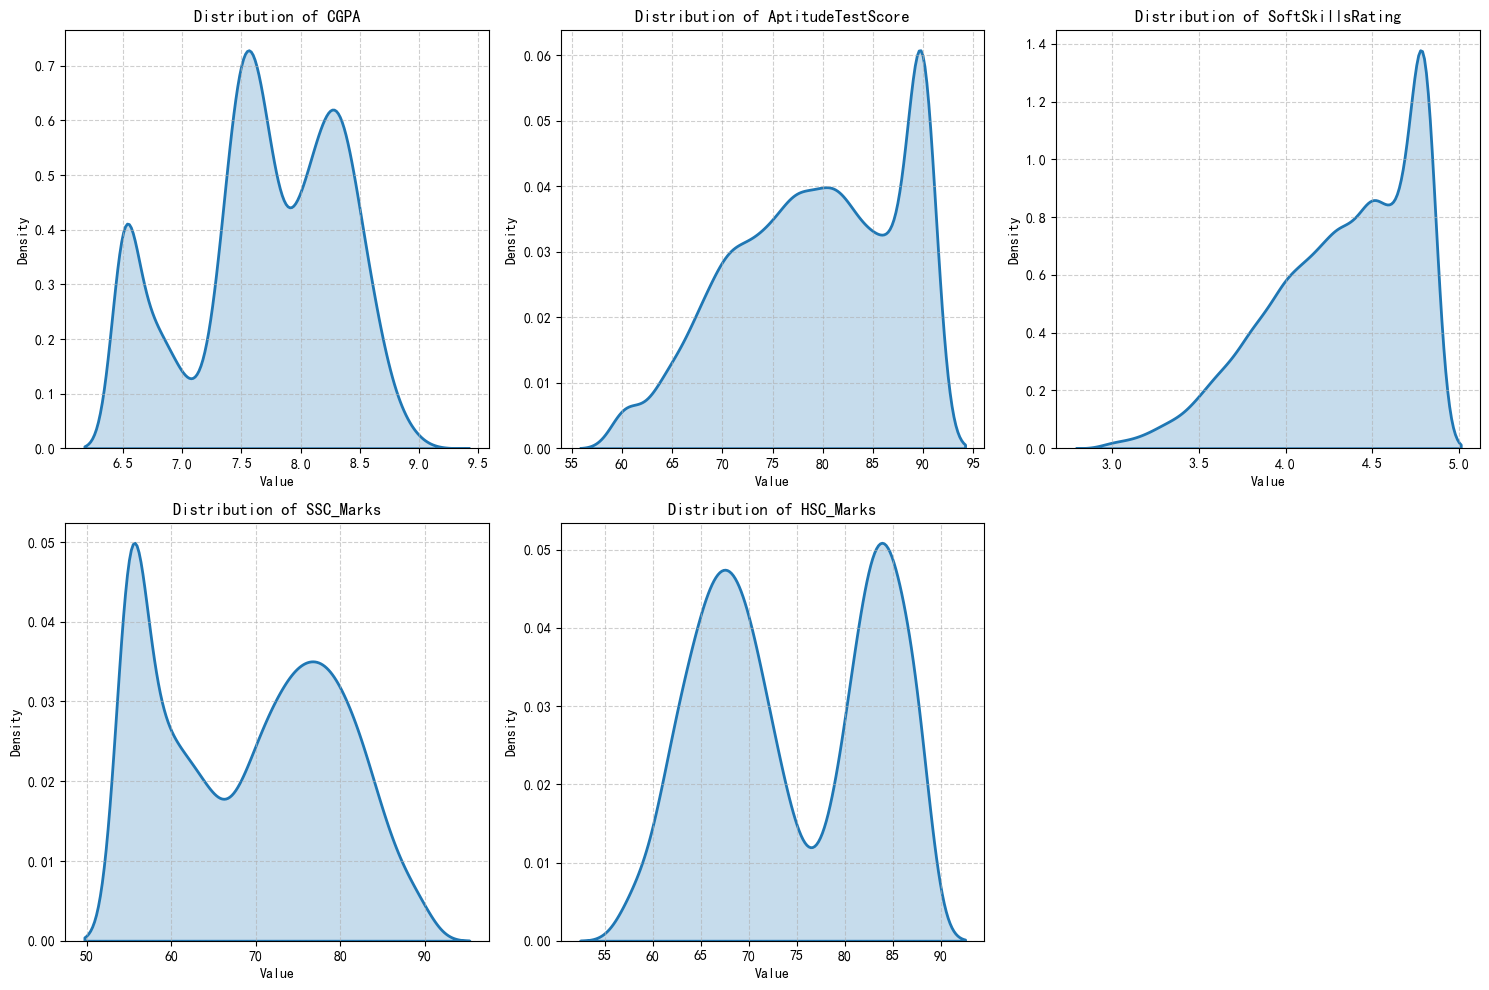

In [9]:
# 分别查看连续型特征的分布
numeric_columns = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2行3列，最后一个子图留空
axes = axes.ravel()  # 展平 axes 数组，方便遍历

for i, col in enumerate(numeric_columns):
    sns.kdeplot(df[col], ax=axes[i], linewidth=2, fill=True)
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("Value", fontsize=10)
    axes[i].set_ylabel("Density", fontsize=10)
    axes[i].grid(True, linestyle='--', alpha=0.6)

if len(numeric_columns) < len(axes):
    for j in range(len(numeric_columns), len(axes)):
        axes[j].set_visible(False)

plt.savefig("figures/Distribution of Continuous Features.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

C:\Users\Ray\AppData\Local\Temp\ipykernel_10892\1505086330.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Blues', edgecolor='black')
C:\Users\Ray\AppData\Local\Temp\ipykernel_10892\1505086330.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Blues', edgecolor='black')
C:\Users\Ray\AppData\Local\Temp\ipykernel_10892\1505086330.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='Blues', edgecolor='black')
C:\Users\Ray\

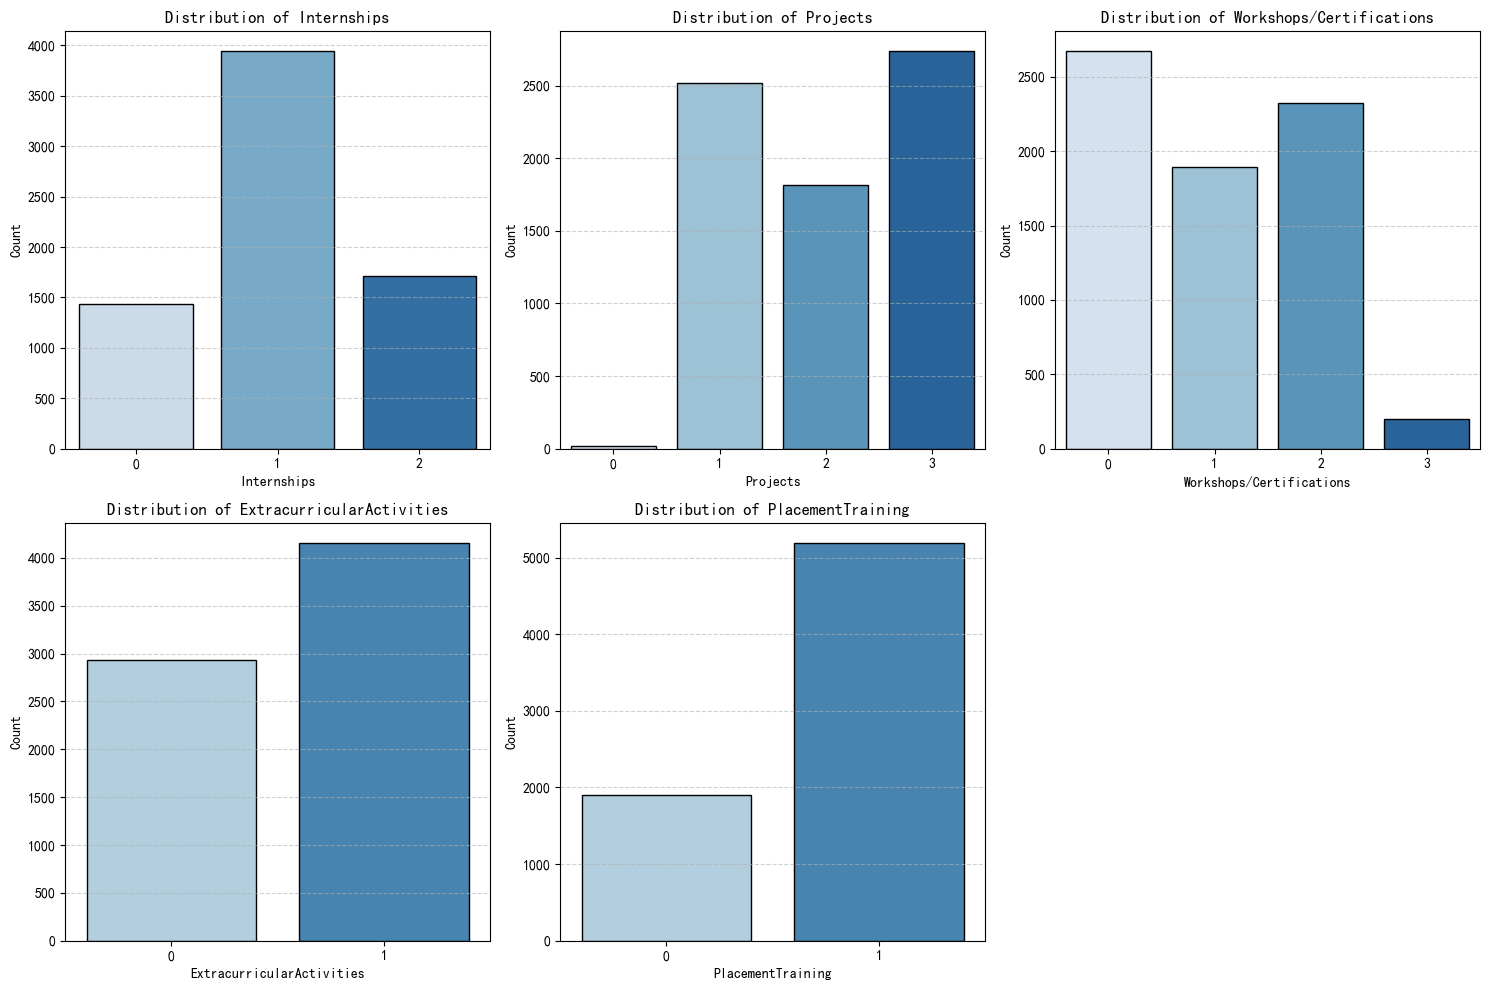

In [10]:
# 分别查看类别型特征的分布
categorical_columns = ['Internships', 'Projects', 'Workshops/Certifications', 'ExtracurricularActivities', 'PlacementTraining']


fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()


for i, col in enumerate(categorical_columns):
    if i < len(axes):
        sns.countplot(data=df, x=col, ax=axes[i], palette='Blues', edgecolor='black')
        axes[i].set_title(f"Distribution of {col}", fontsize=12)
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel("Count", fontsize=10)
        axes[i].grid(True, linestyle='--', alpha=0.6, axis='y')

        axes[i].xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        if df[col].nunique() > 10:
            axes[i].tick_params(axis='x', rotation=45)

for j in range(len(categorical_columns), len(axes)):
    axes[j].set_visible(False)

plt.savefig("figures/Distribution of Categorical Features.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

注意上述分布，以及类别平衡问题

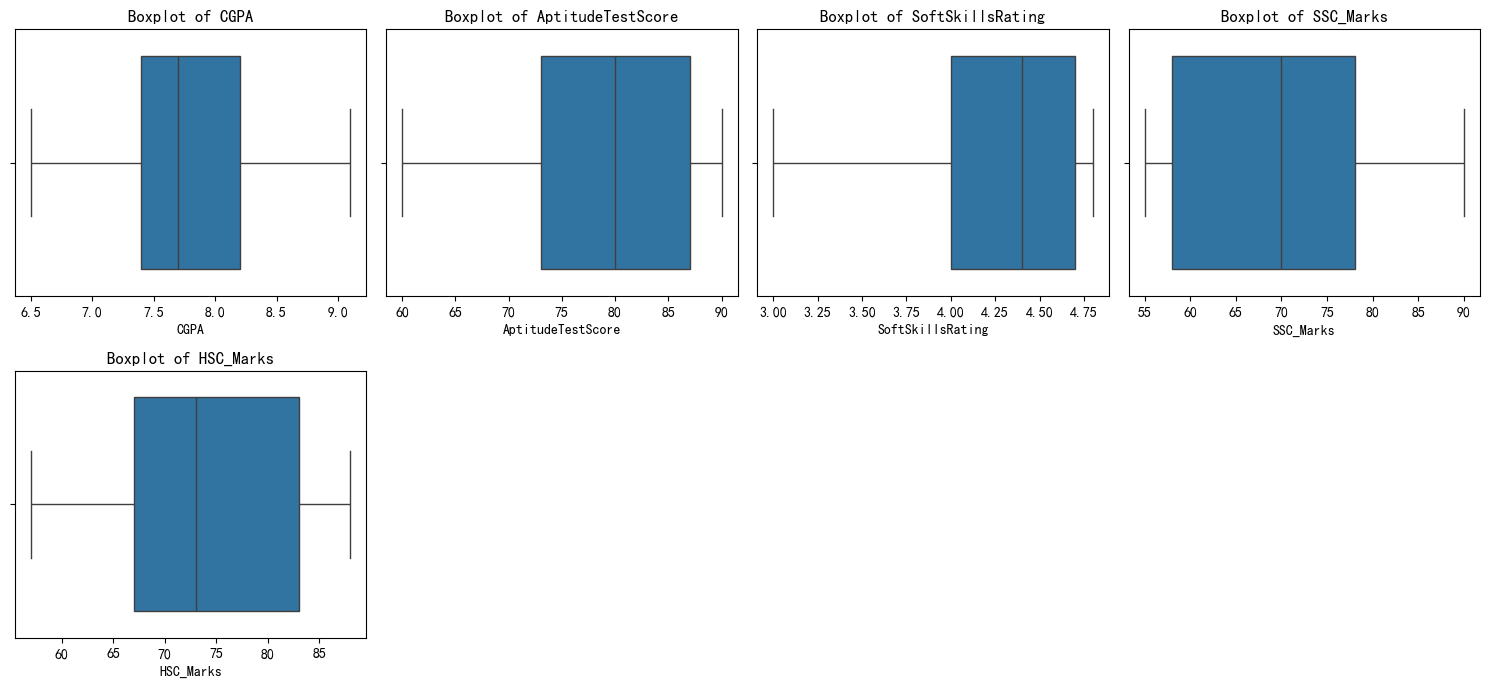

In [11]:
# 检查异常值（使用箱线图）
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 4, i+1)
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot of {column}")

plt.savefig("figures/Boxplot.png", bbox_inches='tight')
plt.tight_layout()
plt.show()

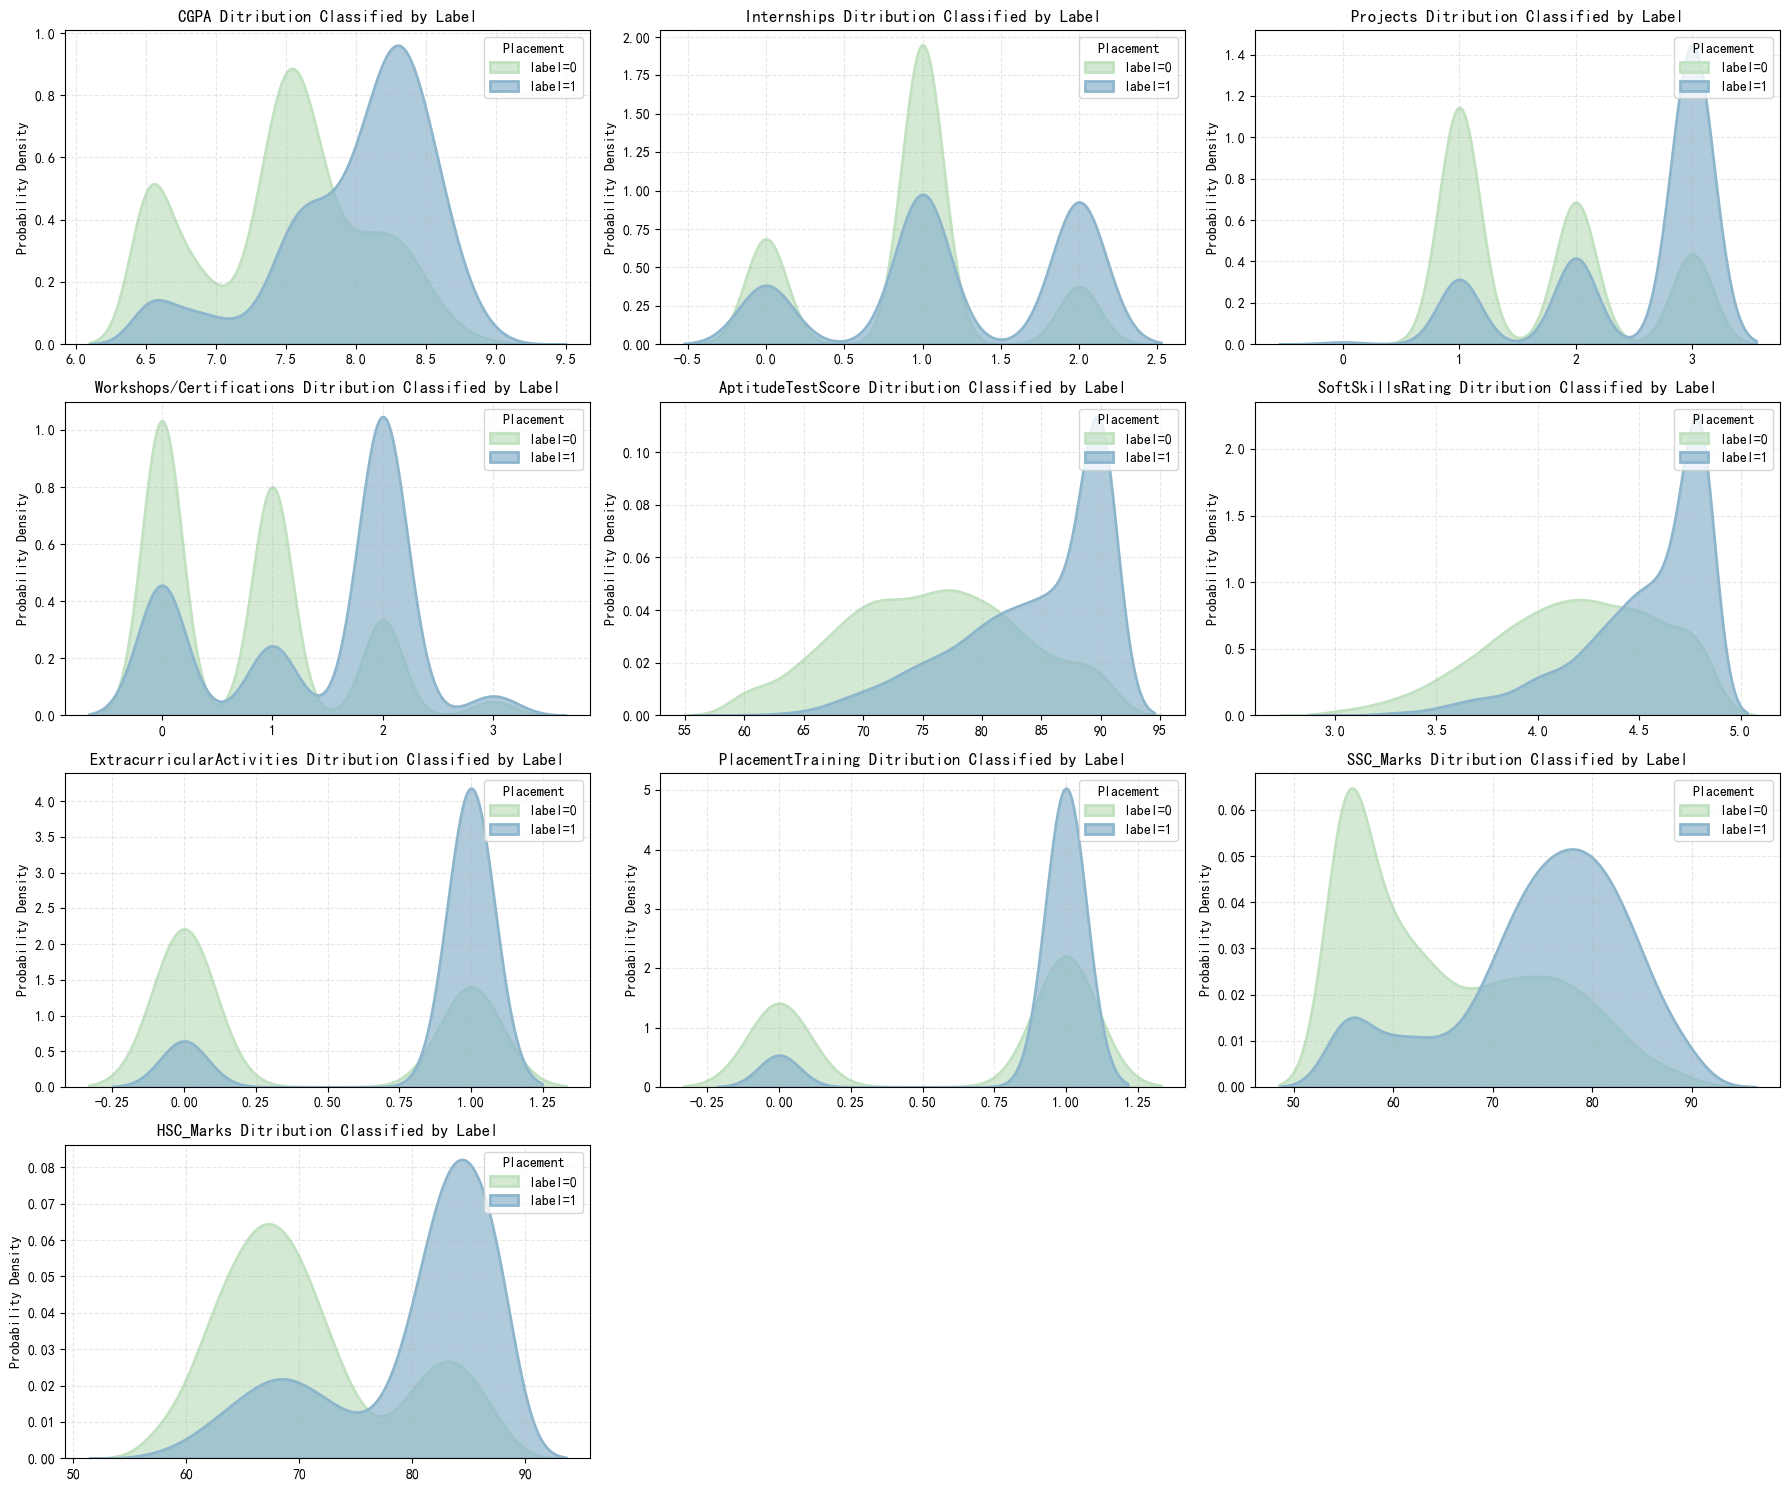

In [12]:
# 各特征按label分类的概率密度图 （定义：密度总面积为1）
def plot_smooth_dist_by_label(data, features, label_col='label', figsize=(18, 15), cols_per_row=3, bw_adjust=1, filename=""):
    """
    绘制平滑曲线频率分布图（KDE归一化，频率积分=1，按label分组）
    
    参数:
        data: DataFrame, 包含特征和label列
        features: list, 需要绘制的数值特征列名列表
        label_col: str, 目标列名（默认'label'）
        figsize: tuple, 图表大小
        cols_per_row: int, 每行子图数量
        bw_adjust: float, 带宽调整因子（越大曲线越平滑）
    """
    # 计算行数
    n_cols = len(features)
    n_rows = (n_cols + cols_per_row - 1) // cols_per_row
    
    # 创建子图
    fig, axes = plt.subplots(n_rows, cols_per_row, figsize=figsize)
    axes = axes.flatten() if n_rows > 1 else [axes]
    
    # 为每个特征绘制分组KDE曲线
    for i, col in enumerate(features):
        ax = axes[i]
        
        # 按label分组计算KDE
        for label, color in zip([0, 1], ['#C1E1C1', '#8DB6CD']):
            subset = data[data[label_col] == label][col].dropna()
            sns.kdeplot(
                data=subset,
                ax=ax,
                color=color,
                label=f'{label_col}={label}',
                bw_adjust=bw_adjust,
                linewidth=2,
                alpha=0.7,
                fill=True
            )
        
        # 验证曲线下面积=1（调试用）
        if False:  # 设置为True可打印验证
            for line in ax.lines:
                x, y = line.get_data()
                area = simps(y, x)
                print(f"{col} {line.get_label()} 曲线下面积: {area:.4f}")
        
        ax.set_title(f'{col} Ditribution Classified by Label', fontsize=12)
        ax.set_xlabel('')
        ax.set_ylabel('Probability Density', fontsize=10)
        ax.legend(title='Placement')
        ax.grid(True, linestyle='--', alpha=0.3)
    
    # 隐藏多余子图
    for j in range(i+1, len(axes)):
        axes[j].axis('off')

    plt.savefig(f"figures/Distribution Classified by Label{filename}.png", bbox_inches='tight')
    plt.tight_layout()
    plt.show()

# 调用
features_to_plot = ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore',
                    'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks', 'HSC_Marks']
plot_smooth_dist_by_label(df, features=features_to_plot, bw_adjust=1.2)

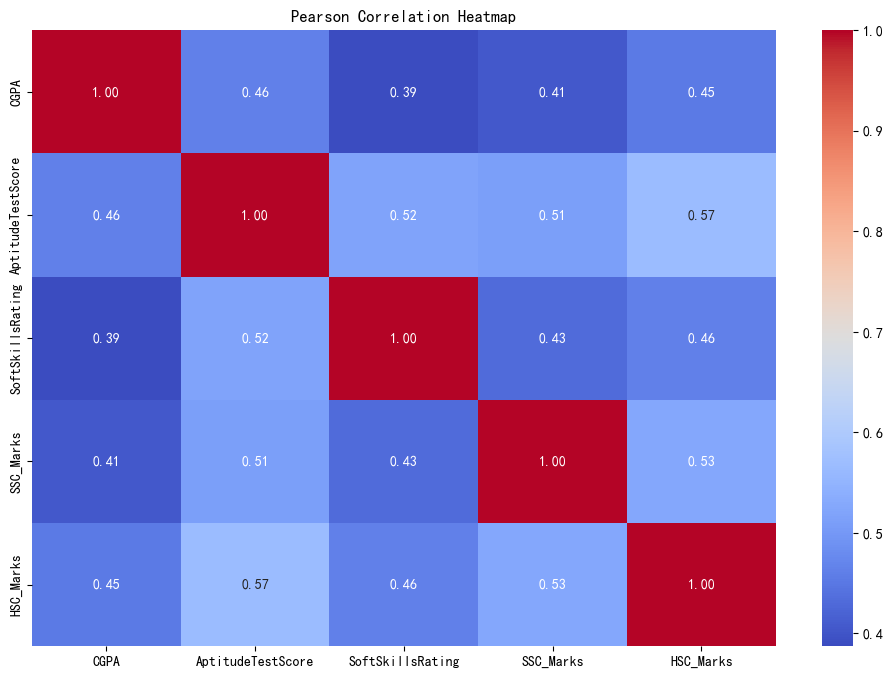

In [13]:
# 查看各特征与目标变量的线性相关性
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pearson Correlation Heatmap")
plt.savefig("figures/Pearson Correlation Heatmap.png", bbox_inches='tight')
plt.show()

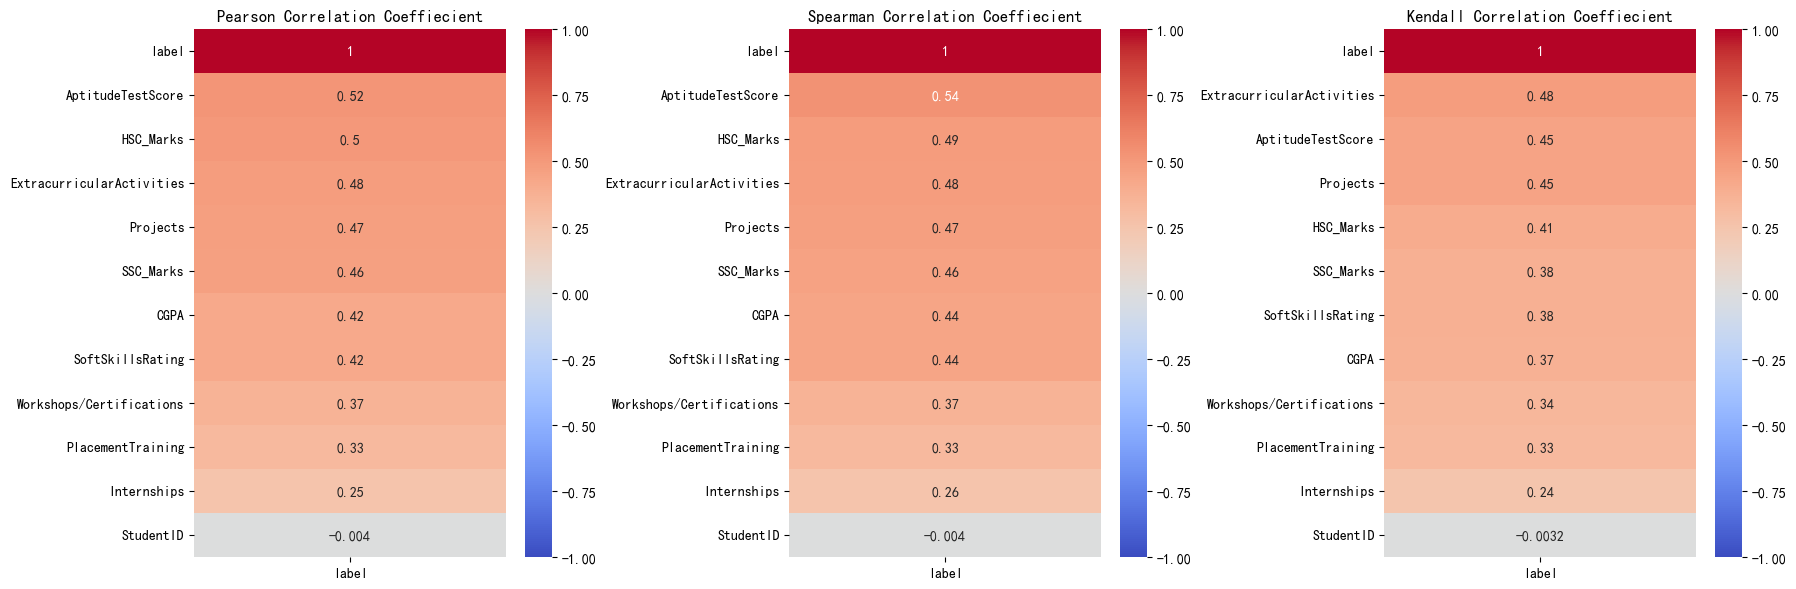

In [14]:
methods = [
    ('pearson', 'Pearson Correlation Coeffiecient'),
    ('spearman', 'Spearman Correlation Coeffiecient'),
    ('kendall', 'Kendall Correlation Coeffiecient')
]

# 创建画布
plt.figure(figsize=(18, 6))

# 使用循环绘制三个子图
for i, (method, title) in enumerate(methods, 1):
    plt.subplot(1, 3, i)
    corr = df.corr(method=method, numeric_only=True)
    sns.heatmap(corr[['label']].sort_values(by='label', ascending=False), 
                annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)

# 调整布局并显示
plt.tight_layout()
plt.savefig("figures/Correlation Analysis.png", bbox_inches='tight')
plt.show()

# 2. Data Processing

根据步骤1中的结果，无需处理空值和异常值

In [15]:
# 删除部分列
df.drop('StudentID', axis=1, inplace=True)
df.head()

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,label
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,7.3,1,2,2,82,4.8,1,0,79,80,0
2,7.5,1,1,2,85,4.4,1,1,81,80,1
3,7.0,0,2,2,71,4.2,1,0,55,66,0
4,7.7,1,1,1,76,4.0,0,0,62,65,0


In [16]:
# # 独热编码
# from sklearn.preprocessing import OneHotEncoder

# onehot_cols = ['Internships', 'Projects', 'Workshops/Certifications']

# def one_hot_encode_sklearn(df, cols):
#     """
#     使用sklearn的OneHotEncoder进行独热编码
#     参数:
#         df: 原始DataFrame
#         cols: 需要编码的列名列表
#     返回:
#         编码后的DataFrame和编码器对象（用于后续数据）
#     """
#     # 创建编码器
#     encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    
#     # 应用编码
#     encoded_data = encoder.fit_transform(df[cols])
    
#     # 创建新列名
#     feature_names = []
#     for i, col in enumerate(cols):
#         categories = encoder.categories_[i]
#         feature_names.extend([f"{col}_{cat}" for cat in categories])
    
#     # 构建编码后的DataFrame
#     df_encoded = pd.concat([
#         df.drop(cols, axis=1),
#         pd.DataFrame(encoded_data, columns=feature_names)
#     ], axis=1)
    
#     return df_encoded, encoder

# df_sklearn_encoded, encoder = one_hot_encode_sklearn(df, onehot_cols)
# print("\n独热编码结果示例:")
# print(df_sklearn_encoded.filter(regex='Internships_|Projects_|Workshops/Certifications_').head())

In [17]:
# df_sklearn_encoded.info()

### 其他特征

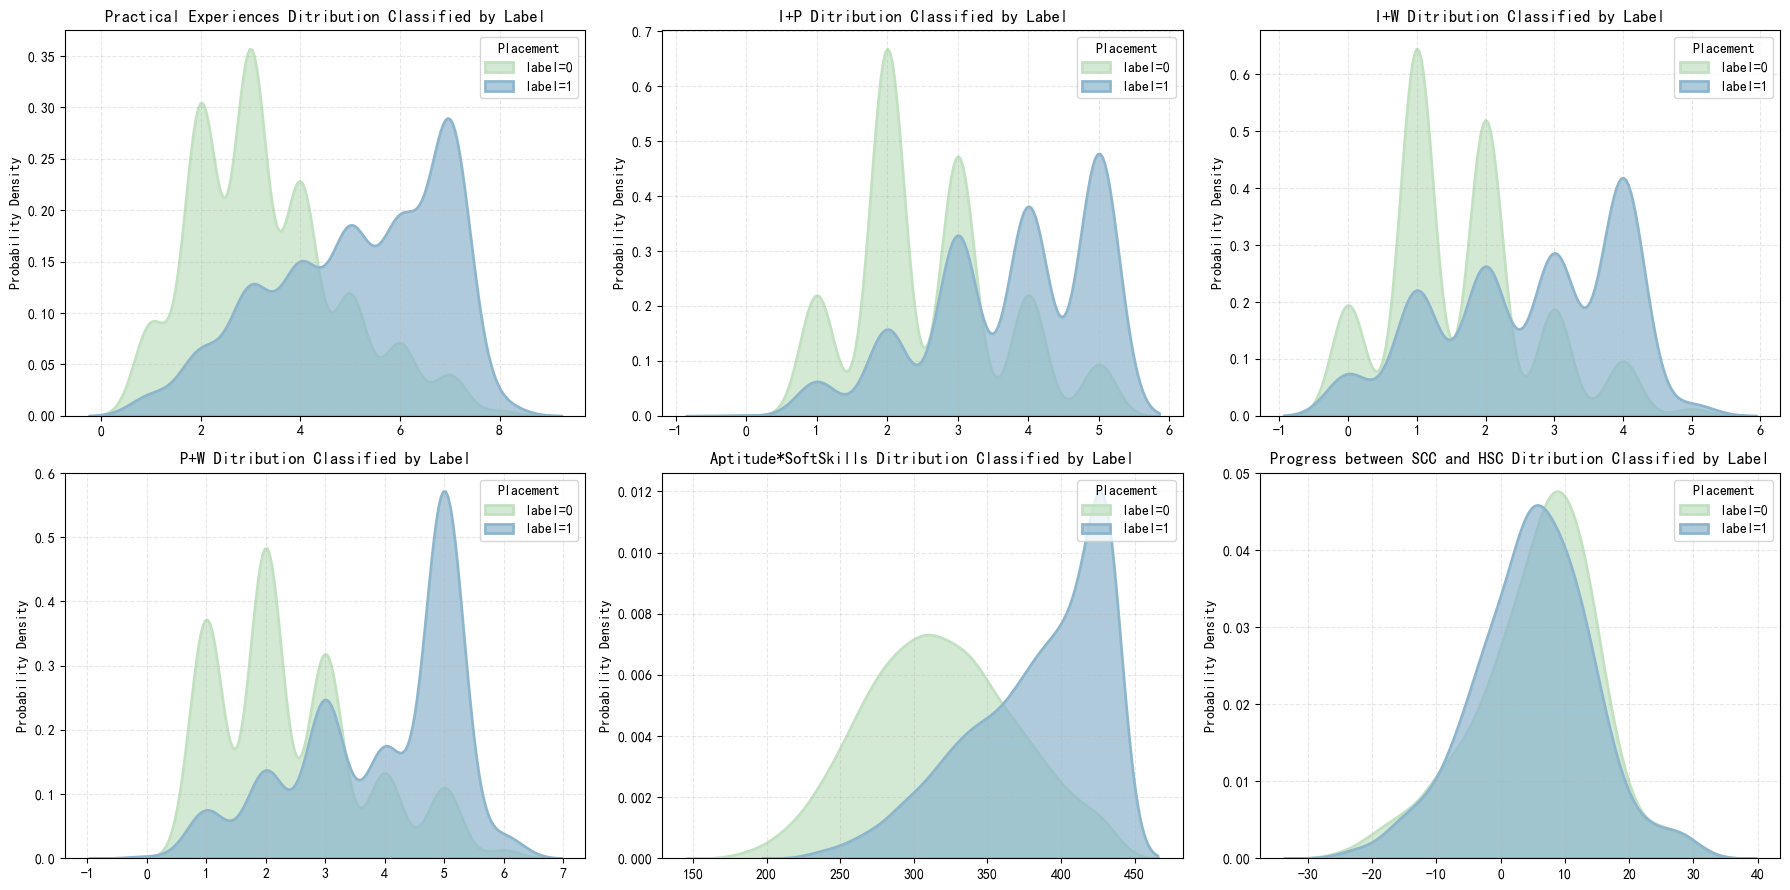

In [18]:
df['Practical Experiences'] = df['Internships'] + df['Projects'] + df['Workshops/Certifications']
df['I+P'] = df['Internships'] + df['Projects']
df['I+W'] = df['Internships'] + df['Workshops/Certifications']
df['P+W'] = df['Projects'] + df['Workshops/Certifications']

df['Aptitude*SoftSkills'] = df['AptitudeTestScore'] * df['SoftSkillsRating']

df['Progress between SCC and HSC'] = df['HSC_Marks'] - df['SSC_Marks']

features_to_plot = ['Practical Experiences', 'I+P', 'I+W', 'P+W', 'Aptitude*SoftSkills','Progress between SCC and HSC']
plot_smooth_dist_by_label(df, features=features_to_plot, figsize=(18, 9), bw_adjust=1.2, filename=" (new features)")

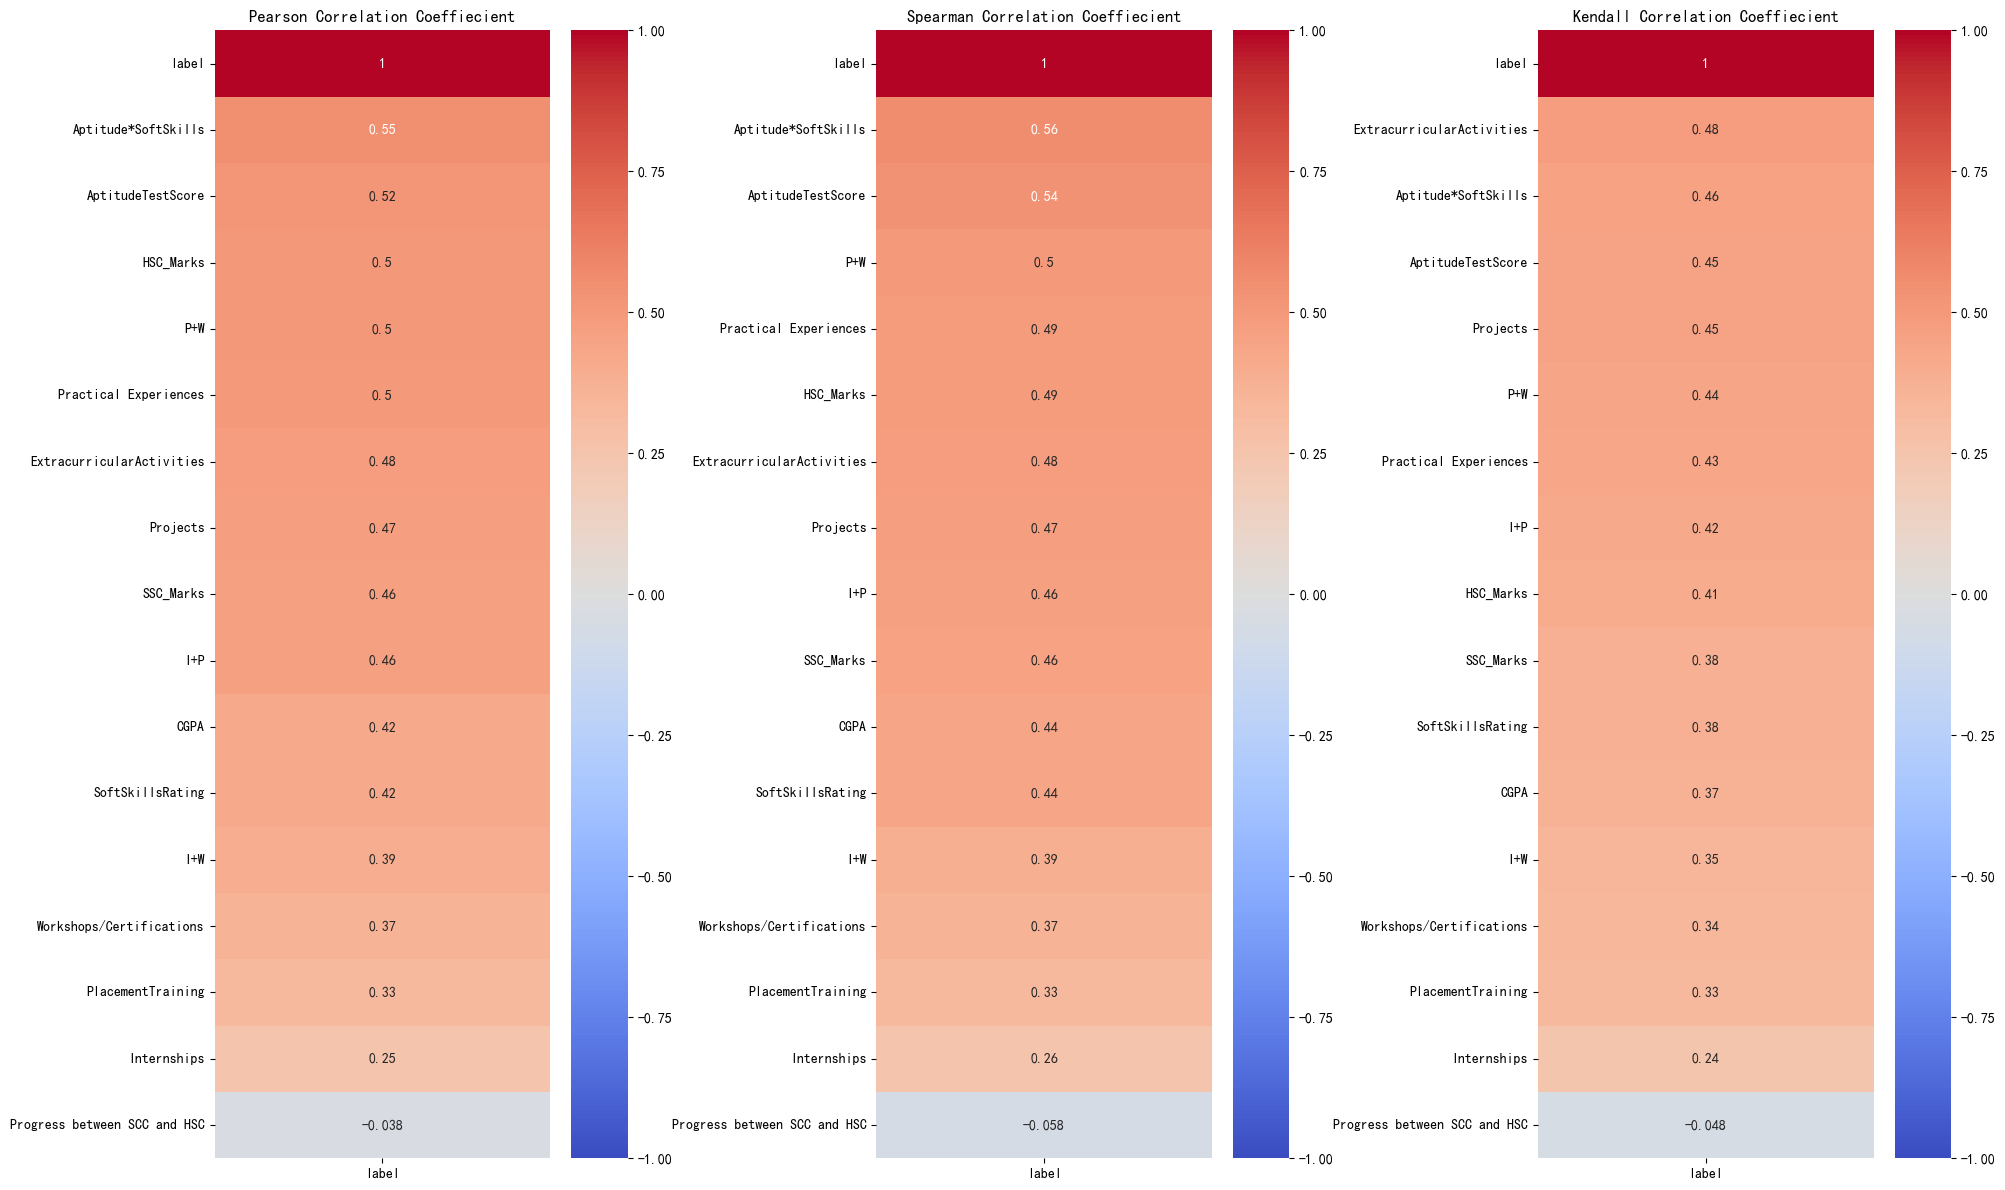

In [20]:
methods = [
    ('pearson', 'Pearson Correlation Coeffiecient'),
    ('spearman', 'Spearman Correlation Coeffiecient'),
    ('kendall', 'Kendall Correlation Coeffiecient')
]

# 创建画布
plt.figure(figsize=(20, 12))

# 使用循环绘制三个子图
for i, (method, title) in enumerate(methods, 1):
    plt.subplot(1, 3, i)
    corr = df.corr(method=method, numeric_only=True)
    sns.heatmap(corr[['label']].sort_values(by='label', ascending=False), 
                annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(title)

# 调整布局并显示
plt.tight_layout()
plt.savefig("figures/Correlation Analysis (with new features).png", bbox_inches='tight')
plt.show()

In [21]:
# df['CGPA less than 7'] = np.where(df['CGPA'] <= 7, 1, 0)
# df['CGPA more than 8.3'] = np.where(df['CGPA'] >= 8.3, 1, 0)

df['Internships less than 2'] = np.where(df['Internships'] < 2, 1, 0)
df.drop('Internships', axis=1, inplace=True)

df['Workshops/Certifications less than 2'] = np.where(df['Workshops/Certifications'] < 2, 1, 0)
# df['Workshops/Certifications==2'] = np.where(df['Workshops/Certifications'] == 2, 1, 0)
df.drop('Workshops/Certifications', axis=1, inplace=True)

# df['AptitudeTestScore less than 75'] = np.where(df['AptitudeTestScore'] <= 75, 1, 0)
# df['AptitudeTestScore more than 86'] = np.where(df['AptitudeTestScore'] >= 88, 1, 0)

# df['SoftSkillsRating less than 4.1'] = np.where(df['SoftSkillsRating'] <= 4.1, 1, 0)
# df['SoftSkillsRating more than 4.8'] = np.where(df['SoftSkillsRating'] >= 4.8, 1, 0)

# df['SSC_Marks less than 60'] = np.where(df['SSC_Marks'] <= 65, 1, 0)
# df['SSC_Marks more than 80'] = np.where(df['SSC_Marks'] >= 80, 1, 0)

# df['HSC_Marks less than 70'] = np.where(df['HSC_Marks'] <= 70, 1, 0)
# df['HSC_Marks more than 83'] = np.where(df['HSC_Marks'] >= 83, 1, 0)

df.drop('Progress between SCC and HSC', axis=1, inplace=True)

In [22]:
# Selected Features
# selected_features = ['label', 'PlacementTraining', 'CGPA', 'AptitudeTestScore', 'ExtracurricularActivities', 'Workshops/Certifications more than 1', 
#                      'Aptitude*SoftSkills', 'SSC_Marks', 'CGPA less than 7',  
#                      'Workshops/Certifications==2', 'Projects', 'HSC_Marks']

# selected_features = ['label', 'PlacementTraining', 'CGPA', 'AptitudeTestScore', 'ExtracurricularActivities', 'Workshops/Certifications more than 1', 
#                      'Aptitude*SoftSkills', 'SSC_Marks', 'CGPA less than 7',  
#                      'Workshops/Certifications==2', 'Projects', 'HSC_Marks',
#                      'I+W', 'I+P', 'P+W',
#                     'SSC_Marks less than 60', 'SoftSkillsRating', 'SoftSkillsRating less than 4.1']

# selected_features = ['label', 'PlacementTraining', 'CGPA', 'AptitudeTestScore', 'ExtracurricularActivities', 'Workshops/Certifications more than 1', 
#                      'Aptitude*SoftSkills', 'SSC_Marks',  
#                      'Workshops/Certifications==2', 'Projects', 'HSC_Marks']

# df = df[selected_features]

In [23]:
df.head()

,CGPA,Projects,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,label,Practical Experiences,I+P,I+W,P+W,Aptitude*SoftSkills,Internships less than 2,Workshops/Certifications less than 2
0,7.5,1,65,4.4,0,0,61,79,0,3,2,2,2,286.0,1,1
1,7.3,2,82,4.8,1,0,79,80,0,5,3,3,4,393.6,1,0
2,7.5,1,85,4.4,1,1,81,80,1,4,2,3,3,374.0,1,0
3,7.0,2,71,4.2,1,0,55,66,0,4,2,2,4,298.2,1,0
4,7.7,1,76,4.0,0,0,62,65,0,3,2,2,2,304.0,1,1


In [24]:
# df_sklearn_encoded.to_csv('train_new.csv', index=False)
df.to_csv('train_new.csv', index=False)

# 3. Modeling
考虑因素：
- 高偏度特征分布变换
- 类别不平衡
- 添加组合特征，删除低贡献特征
- 扩展参数网格
- 改用LightGBM
- 分析预测错误的样本后针对性改进？

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']  
plt.rcParams['axes.unicode_minus'] = False 

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, make_scorer, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE  # 过采样处理类别不平衡
from imblearn.pipeline import Pipeline  # 将过采样和模型结合为统一流程
from scipy.stats import loguniform, randint, uniform
from joblib import load, dump
import os

### ML + GridSearch:

训练集类别比例:
 label
0    0.586071
1    0.413929
Name: proportion, dtype: float64

=== 正在训练 Logistic Regression ===
Fitting 5 folds for each of 16 candidates, totalling 80 fits
模型已保存为: saved_models/Logistic_Regression.joblib
最佳参数: {'model__C': 0.05, 'model__class_weight': None}
平均Macro-F1: 0.7894

特征重要性：
                             Feature  Importance
Workshops/Certifications less than 2    0.545218
                   PlacementTraining    0.459259
                 Aptitude*SoftSkills    0.425282
           ExtracurricularActivities    0.324940
                                 I+W    0.309252
                   AptitudeTestScore    0.307960
                           SSC_Marks    0.261098
                           HSC_Marks    0.237045
                                CGPA    0.235196
                            Projects    0.216282
             Internships less than 2    0.150054
                                 I+P    0.121055
                                 P+W    0.113270
             

C:\Users\Ray\AppData\Local\Temp\ipykernel_10892\1599873880.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')


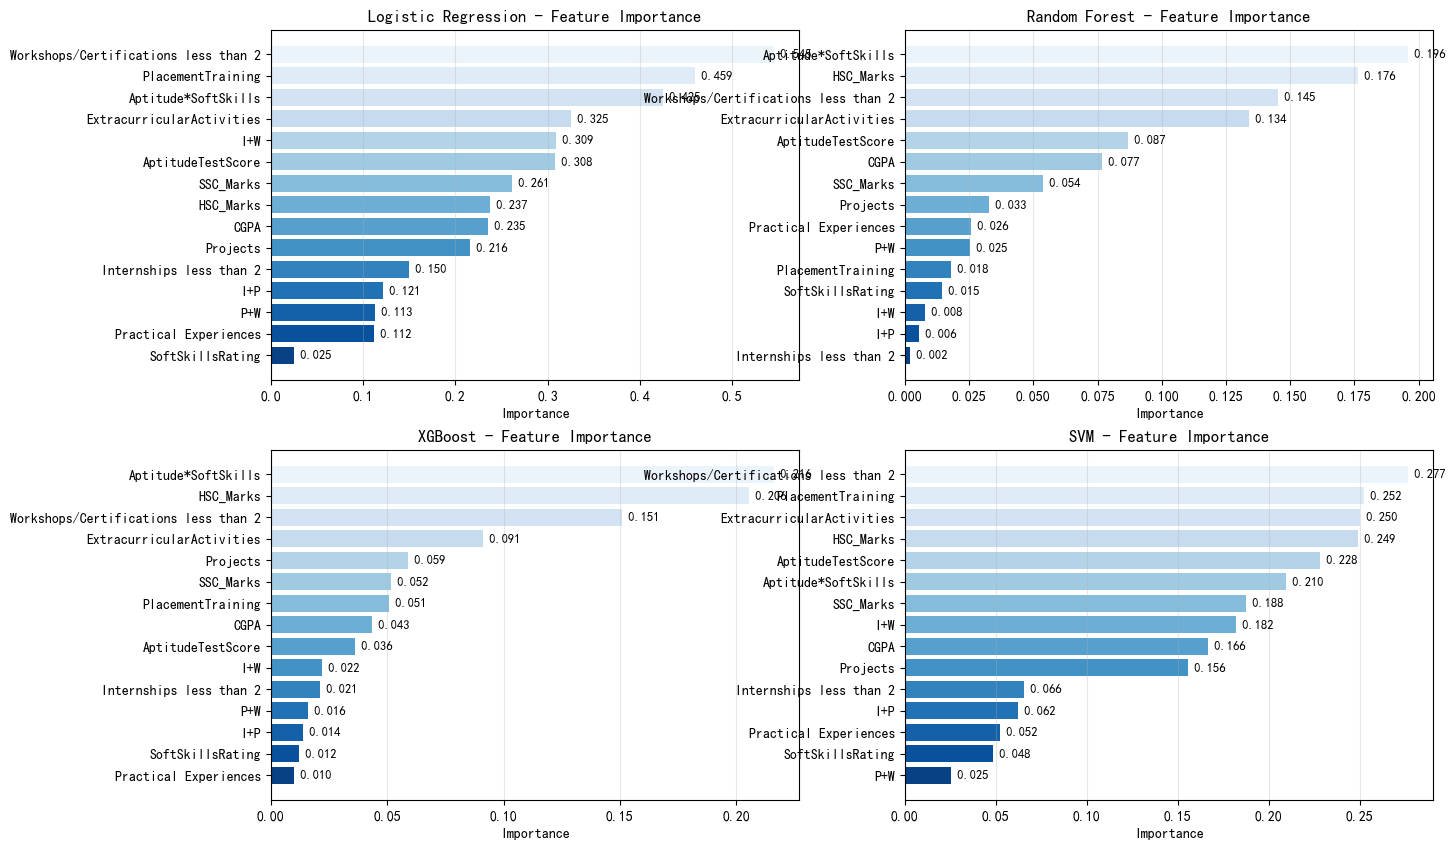

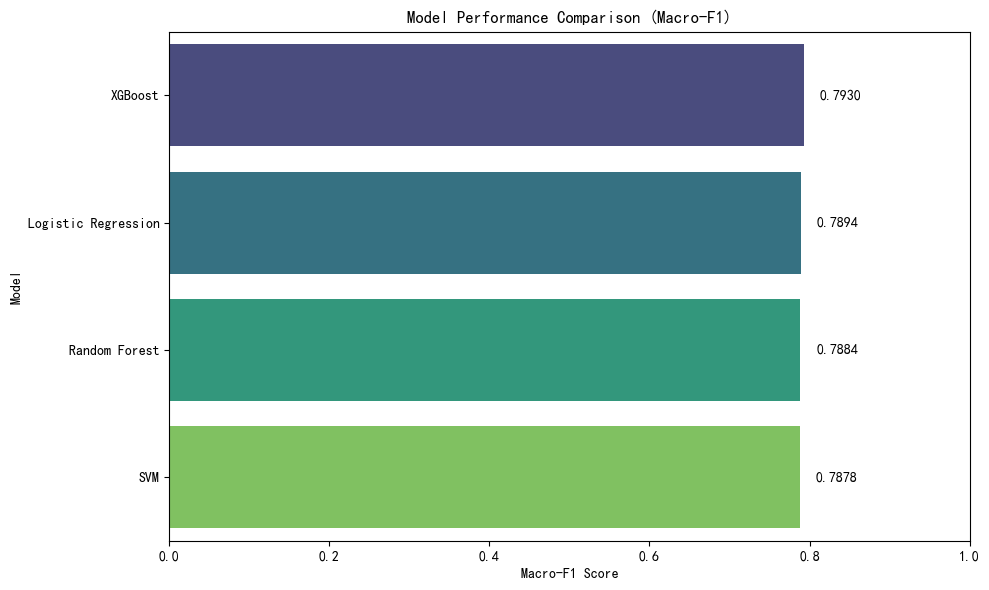


Best Model: XGBoost (Macro-F1: 0.7930)


In [26]:
# 1. 数据加载
df = pd.read_csv("train_new.csv")
X_train = df.drop(columns=['label'])  # 移除无关列
y_train = df['label']

# 2. 检查类别平衡
print("训练集类别比例:\n", y_train.value_counts(normalize=True))

# 3. 标准化
# continuous_features = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

# 4. 定义模型和参数网格
os.makedirs('saved_models', exist_ok=True)
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'model__C': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1, 10],  # 注意维度
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'model__n_estimators': [20, 30, 50, 100, 150, 200, 300],
            'model__max_depth': [None, 5, 7, 10, 12],  # 注意维度
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": False
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss'),
        "params": {
            'model__learning_rate': [0.005, 0.01, 0.03, 0.05, 0.07, 0.1],
            'model__max_depth': [3, 5, 7, 10],
            'model__scale_pos_weight': [1, (len(y_train) - sum(y_train)) / sum(y_train)]
        },
        "needs_scaling": False
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            'model__C': [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True
    }
}

# 5. 交叉验证设置
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # 5 fold
scorer = make_scorer(f1_score, average='macro')

# 6. 模型训练与评估
results = []
feature_importances = {}
plt.figure(figsize=(15, 10))
plt_idx = 1  # 用于子图位置索引

for model_name, model_info in models.items():
    print(f"\n=== 正在训练 {model_name} ===")
    
    # 创建Pipeline（标准化 + 过采样 + 模型）
    steps = []
    if model_info["needs_scaling"]:
        steps.append(('scaler', StandardScaler()))
    steps.extend([
        ('smote', SMOTE(random_state=42)),
        ('model', model_info["model"])
    ])
    # steps.extend([
    #     ('model', model_info["model"])
    # ])
    pipeline = Pipeline(steps)
    
    # 网格搜索
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=model_info["params"],
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    
    # 存储最佳模型
    best_model = grid.best_estimator_
    model_filename = f"saved_models/{model_name.replace(' ', '_')}.joblib"
    dump(best_model, model_filename)
    print(f"模型已保存为: {model_filename}")
    
    # 交叉验证结果
    cv_results = grid.cv_results_
    best_score = grid.best_score_
    print(f"最佳参数: {grid.best_params_}")
    print(f"平均Macro-F1: {best_score:.4f}")
    
    # 记录结果
    results.append({
        'Model': model_name,
        'Macro-F1': best_score,
        'Best Params': grid.best_params_
    })
    
    # 特征重要性分析并可视化
    if hasattr(best_model.named_steps['model'], 'coef_'):
        importance = np.abs(best_model.named_steps['model'].coef_[0])
    elif hasattr(best_model.named_steps['model'], 'feature_importances_'):
        importance = best_model.named_steps['model'].feature_importances_
    else:
        importance = None
    
    if importance is not None:
        feat_importance = pd.DataFrame({
            'Feature': df.drop(columns=['label']).columns,
            'Importance': importance
        }).sort_values('Importance', ascending=False)
        
        feature_importances[model_name] = feat_importance
        
        # 打印表格
        print("\n特征重要性：")
        print(feat_importance.head(25).to_string(index=False))
        
        # 可视化 - 创建子图
        plt.subplot(2, 2, plt_idx)
        plt_idx += 1
        
        # 特征重要性
        top_features = feat_importance.head(25).sort_values('Importance', ascending=True)
        
        # 绘制水平条形图
        plt.barh(top_features['Feature'], top_features['Importance'], 
                color=sns.color_palette("Blues_r", 15))
        
        plt.title(f'{model_name} - Feature Importance')
        plt.xlabel('Importance')
        plt.grid(axis='x', alpha=0.3)
        
        # 添加数值标签
        for i, v in enumerate(top_features['Importance']):
            plt.text(v, i, f" {v:.3f}", va='center', fontsize=9)
        plt.savefig("figures/Feature Importance.png", bbox_inches='tight')
    
    else:
        print("该模型不提供特征重要性分析")

# 7. 结果对比可视化
results_df = pd.DataFrame(results).sort_values('Macro-F1', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance Comparison (Macro-F1)')
plt.xlim(0, 1)
plt.xlabel('Macro-F1 Score')
plt.ylabel('Model')
for i, v in enumerate(results_df['Macro-F1']):
    plt.text(v + 0.02, i, f"{v:.4f}", color='black', va='center')
plt.tight_layout()
plt.savefig("figures/Model Performance Comparison (Macro-F1).png", bbox_inches='tight')
plt.show()

# 8. 输出最佳模型
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest Model: {best_model_name} (Macro-F1: {results_df.iloc[0]['Macro-F1']:.4f})")

### 扩大参数搜索范围：

训练集类别比例:
 label
0    0.586071
1    0.413929
Name: proportion, dtype: float64

=== 正在训练 Logistic Regression ===
Fitting 10 folds for each of 54 candidates, totalling 540 fits
模型已保存为: saved_models/Logistic_Regression.joblib
最佳参数: {'model__C': 10, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
平均Macro-F1: 0.7918

特征重要性：
                             Feature  Importance
                 Aptitude*SoftSkills    1.643361
                    SoftSkillsRating    0.804326
                   PlacementTraining    0.478179
                                CGPA    0.468296
Workshops/Certifications more than 1    0.433546
           ExtracurricularActivities    0.366229
                   AptitudeTestScore    0.359813
                           SSC_Marks    0.270161
                    CGPA less than 7    0.261273
                                 I+W    0.260421
                                 I+P    0.235547
                                 P+W    0.203840
            

KeyboardInterrupt: 

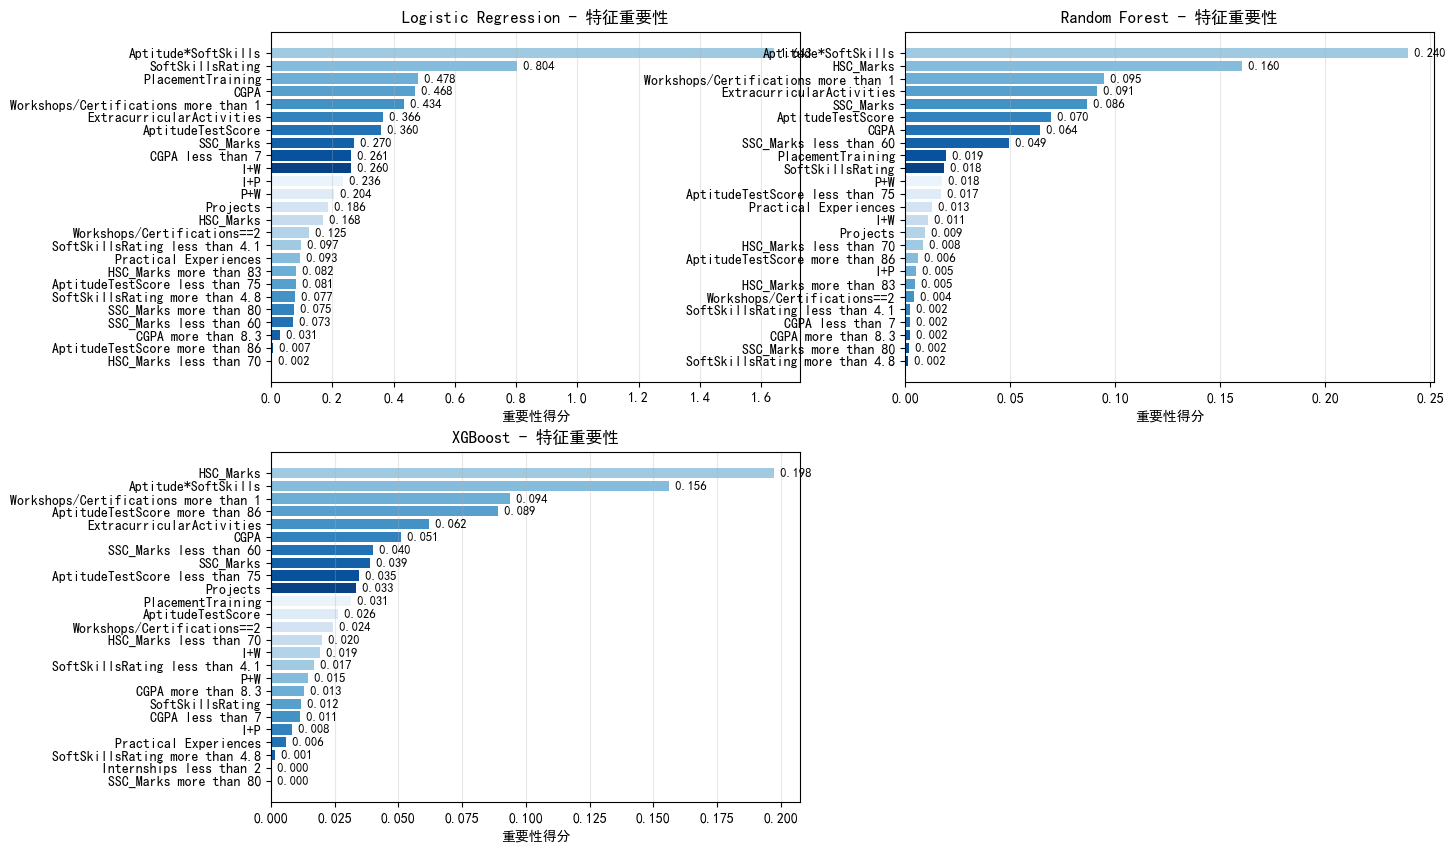

In [26]:
# 1. 数据加载
df = pd.read_csv("train_new.csv")
X_train = df.drop(columns=['label'])  # 移除无关列
y_train = df['label']

# 2. 检查类别平衡
print("训练集类别比例:\n", y_train.value_counts(normalize=True))

# 3. 标准化
# continuous_features = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

# 4. 定义模型和参数网格
os.makedirs('saved_models', exist_ok=True)
models = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            'model__C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 1, 10],  # 注意维度
            'model__penalty': ['l2'], # newly added
            'model__solver': ['lbfgs', 'newton-cg', 'sag'], # newly added
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True
    },
    "Random Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'model__n_estimators': [20, 30, 50, 100, 150, 200, 300],
            'model__max_depth': [None, 5, 7, 10, 15, 20],  # 注意维度
            'model__max_features': ['sqrt', 'log2', 0.3, 0.5, 0.7],  # newly added
            'model__class_weight': [None, 'balanced']  # newly added
        },
        "needs_scaling": False
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss'),
        # "model": XGBClassifier(eval_metric='logloss', n_estimators=1000, early_stopping_rounds=50),
        "params": {
            'model__learning_rate': [0.005, 0.01, 0.03, 0.05, 0.07, 0.1],
            'model__max_depth': [3, 5, 7, 10],
            'model__subsample': [0.7, 0.8, 1.0],         # newly added
            'model__colsample_bytree': [0.7, 0.8, 1.0],  # newly added
            'model__scale_pos_weight': [1, (len(y_train) - sum(y_train)) / sum(y_train)]
        },
        "needs_scaling": False
    },
    "SVM": {
        "model": SVC(probability=True),
        "params": {
            'model__C': [0.001, 0.01, 0.05, 0.1, 0.5, 1, 10],
            'model__kernel': ['linear', 'rbf'],
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True
    }
}

# 5. 交叉验证设置
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average='macro')

# 6. 模型训练与评估
results = []
feature_importances = {}
plt.figure(figsize=(15, 10))
plt_idx = 1  # 用于子图位置索引

for model_name, model_info in models.items():
    print(f"\n=== 正在训练 {model_name} ===")
    
    # 创建Pipeline（标准化 + 过采样 + 模型）
    steps = []
    if model_info["needs_scaling"]:
        steps.append(('scaler', StandardScaler()))
    steps.extend([
        ('smote', SMOTE(random_state=42)),
        ('model', model_info["model"])
    ])
    # steps.extend([
    #     ('model', model_info["model"])
    # ])
    pipeline = Pipeline(steps)
    
    # 网格搜索
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=model_info["params"],
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train)
    
    # 存储最佳模型
    best_model = grid.best_estimator_
    model_filename = f"saved_models/{model_name.replace(' ', '_')}.joblib"
    dump(best_model, model_filename)
    print(f"模型已保存为: {model_filename}")
    
    # 交叉验证结果
    cv_results = grid.cv_results_
    best_score = grid.best_score_
    print(f"最佳参数: {grid.best_params_}")
    print(f"平均Macro-F1: {best_score:.4f}")
    
    # 记录结果
    results.append({
        'Model': model_name,
        'Macro-F1': best_score,
        'Best Params': grid.best_params_
    })
    
    # 特征重要性分析并可视化
    if hasattr(best_model.named_steps['model'], 'coef_'):
        importance = np.abs(best_model.named_steps['model'].coef_[0])
    elif hasattr(best_model.named_steps['model'], 'feature_importances_'):
        importance = best_model.named_steps['model'].feature_importances_
    else:
        importance = None
    
    if importance is not None:
        feat_importance = pd.DataFrame({
            'Feature': df.drop(columns=['label']).columns,
            'Importance': importance
        }).sort_values('Importance', ascending=False)
        
        feature_importances[model_name] = feat_importance
        
        # 打印表格
        print("\n特征重要性：")
        print(feat_importance.head(25).to_string(index=False))
        
        # 可视化 - 创建子图
        plt.subplot(2, 2, plt_idx)
        plt_idx += 1
        
        # 特征重要性
        top_features = feat_importance.head(25).sort_values('Importance', ascending=True)
        
        # 绘制水平条形图
        plt.barh(top_features['Feature'], top_features['Importance'], 
                color=sns.color_palette("Blues_r", 15))
        
        plt.title(f'{model_name} - Feature Importance')
        plt.xlabel('Importance')
        plt.grid(axis='x', alpha=0.3)
        
        # 添加数值标签
        for i, v in enumerate(top_features['Importance']):
            plt.text(v, i, f" {v:.3f}", va='center', fontsize=9)
        plt.savefig("figures/Feature Importance.png", bbox_inches='tight')
        
    else:
        print("该模型不提供特征重要性分析")

# 7. 结果对比可视化
results_df = pd.DataFrame(results).sort_values('Macro-F1', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance Comparison (Macro-F1)')
plt.xlim(0, 1)
plt.xlabel('Macro-F1 Score')
plt.ylabel('Model')
for i, v in enumerate(results_df['Macro-F1']):
    plt.text(v + 0.02, i, f"{v:.4f}", color='black', va='center')
plt.tight_layout()
plt.savefig("figures/Model Performance Comparison (Macro-F1).png", bbox_inches='tight')
plt.show()

# 8. 输出最佳模型
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest Model: {best_model_name} (Macro-F1: {results_df.iloc[0]['Macro-F1']:.4f})")

### 扩大调参范围，改变搜索方式为random search：

训练集类别比例:
 label
0    0.586071
1    0.413929
Name: proportion, dtype: float64

=== 正在训练 Logistic_Regression ===
Fitting 5 folds for each of 50 candidates, totalling 250 fits
模型已保存为: saved_models/Logistic_Regression.joblib
最佳参数: {'model__C': 0.9643857615941438, 'model__class_weight': 'balanced', 'model__l1_ratio': 0.22479561626896213, 'model__penalty': 'elasticnet', 'model__solver': 'saga'}
平均Macro-F1: 0.7914

特征贡献度:

特征重要性：
                   Feature  Importance
         AptitudeTestScore    0.570678
         PlacementTraining    0.482585
 ExtracurricularActivities    0.337471
                 SSC_Marks    0.261372
                 HSC_Marks    0.242212
          SoftSkillsRating    0.240794
                      CGPA    0.228728
Workshops/Certifications_2    0.187578
                Projects_3    0.182589
Workshops/Certifications_1    0.164117
                Projects_0    0.081320
             Internships_1    0.076138
             Internships_0    0.043903
Workshops/Certifications_3 

C:\Users\Ray\AppData\Local\Temp\ipykernel_6276\3581423899.py:227: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')


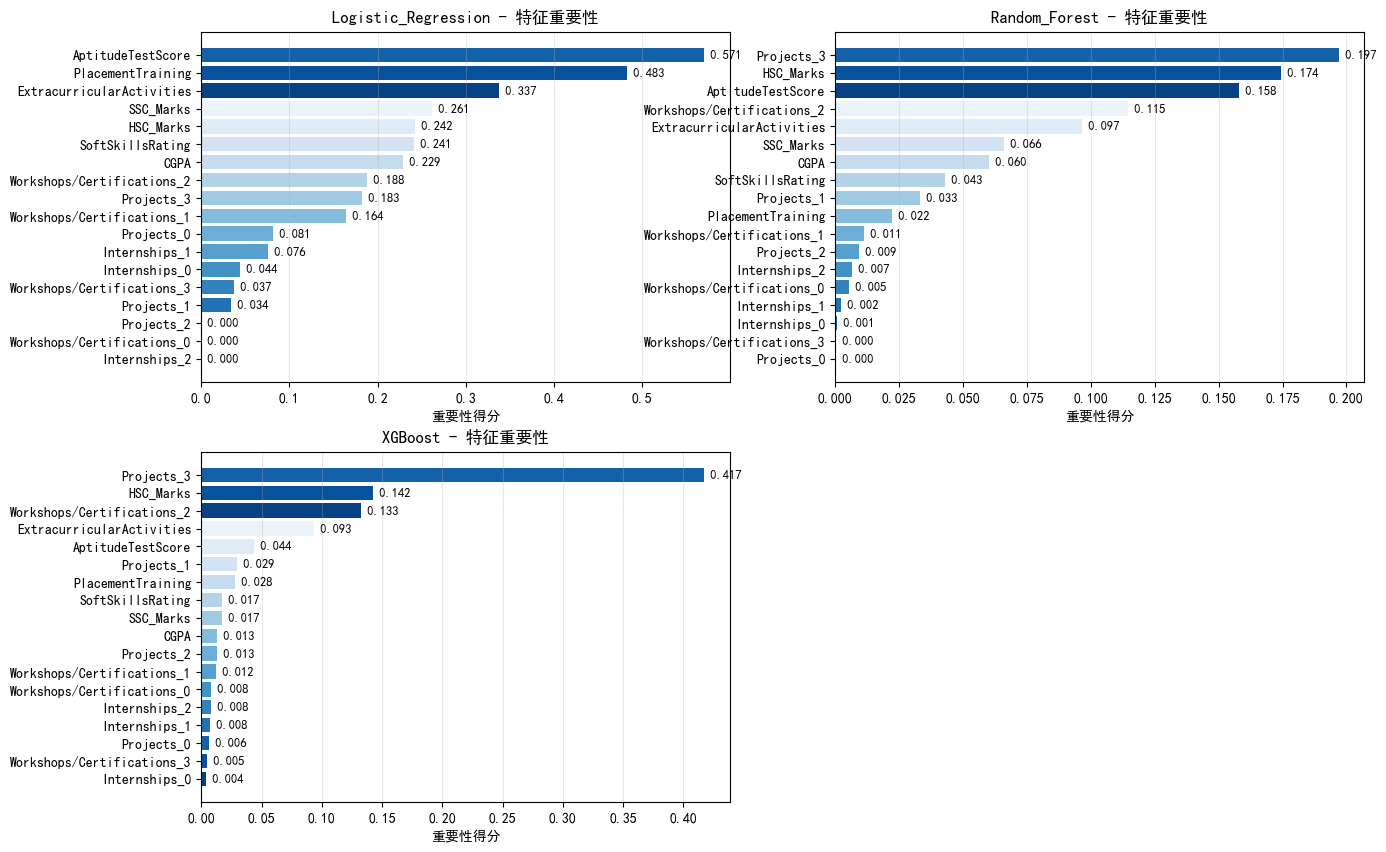

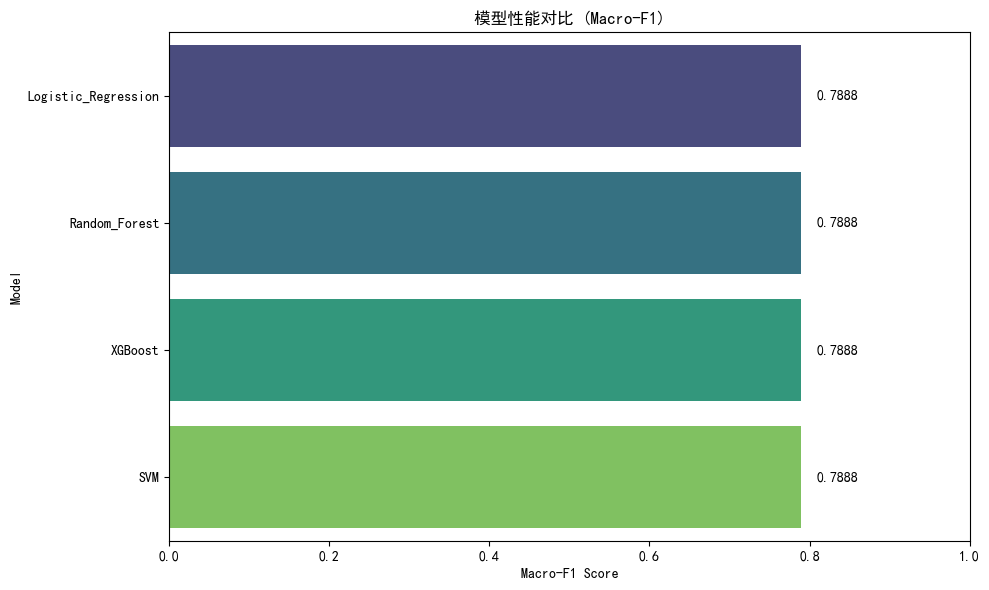


最佳模型: Logistic_Regression (Macro-F1: 0.7888)


In [43]:
# 1. 数据加载
df = pd.read_csv("train_new.csv")
X_train = df.drop(columns=['label'])  # 移除无关列
y_train = df['label']

# 2. 检查类别平衡
print("训练集类别比例:\n", y_train.value_counts(normalize=True))

# 3. 标准化
# continuous_features = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

# 4. 定义模型和参数网格
os.makedirs('saved_models', exist_ok=True)
# 修改为随机搜索的参数分布
models = {
    "Logistic_Regression": {
        "model": LogisticRegression(max_iter=5000),
        "params": {
            'model__C': loguniform(1e-3, 100),  # 对数均匀分布替代固定值
            'model__penalty': ['l1', 'l2', 'elasticnet'],
            'model__solver': ['saga'],
            'model__l1_ratio': uniform(0.1, 0.8),  # 0.1~0.9连续均匀采样
            'model__class_weight': [None, 'balanced']
        },
        "needs_scaling": True,
        "n_iter": 50  # 该模型的随机采样次数
    },
    "Random_Forest": {
        "model": RandomForestClassifier(),
        "params": {
            'model__n_estimators': randint(50, 301),  # 50-300随机整数
            'model__max_depth': [None] + list(range(5, 21, 5)),
            'model__min_samples_split': randint(2, 11),  # 2-10
            'model__min_samples_leaf': randint(1, 5),  # 1-4
            'model__max_features': ['sqrt', 'log2', 0.3, 0.5],
            'model__bootstrap': [True, False],
            'model__class_weight': [None, 'balanced', 'balanced_subsample']
        },
        "needs_scaling": False,
        "n_iter": 30
    },
    "XGBoost": {
        "model": XGBClassifier(eval_metric='logloss', n_estimators=1000), 
        # "model": XGBClassifier(eval_metric='logloss', n_estimators=1000, early_stopping_rounds=50), 
        "params": {
            'model__learning_rate': loguniform(1e-3, 0.3),
            'model__max_depth': randint(3, 10),  # 3-9
            'model__min_child_weight': randint(1, 6),  # 1-5
            'model__gamma': uniform(0, 0.3),  # 0-0.3
            'model__subsample': uniform(0.6, 0.4),  # 0.6-1.0
            'model__colsample_bytree': uniform(0.6, 0.4),  # 0.6-1.0
            'model__reg_alpha': loguniform(1e-3, 10),
            'model__reg_lambda': loguniform(1e-3, 10),
            'model__scale_pos_weight': [
                1, 
                (len(y_train) - sum(y_train)) / sum(y_train),
                (len(y_train) - sum(y_train)) / sum(y_train) * 1.5
            ]
        },
        "needs_scaling": False,
        "n_iter": 40
    }
}

# 6. 模型训练与评估
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42) # 10 fold
scorer = make_scorer(f1_score, average='macro')
results = []
feature_importances = {}
plt.figure(figsize=(15, 10))
plt_idx = 1  # 用于子图位置索引

for model_name, model_info in models.items():
    print(f"\n=== 正在训练 {model_name} ===")
    
    # 创建Pipeline
    steps = []
    if model_info["needs_scaling"]:
        steps.append(('scaler', StandardScaler()))
    steps.extend([
        ('smote', SMOTE(random_state=42)),
        ('model', model_info["model"])
    ])
    # steps.extend([
    #     ('model', model_info["model"])
    # ])
    pipeline = Pipeline(steps)
    
    # 随机搜索
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=model_info["params"],  # 注意改为param_distributions
        n_iter=model_info.get("n_iter", 25),  # 每个模型的采样次数
        cv=cv,
        scoring=scorer,
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    
    # 特殊处理XGBoost的早停
    # random_search.fit(X_train, y_train)
    if model_name == "XGBoost":
        X_train_xgb, X_val, y_train_xgb, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
        )
        random_search.fit(X_train_xgb, y_train_xgb, model__eval_set=[(X_val, y_val)], model__verbose=False)
    else:
        random_search.fit(X_train, y_train)
    
    # 存储最佳模型
    best_model = random_search.best_estimator_
    model_filename = f"saved_models/{model_name.replace(' ', '_')}.joblib"
    dump(best_model, model_filename)
    print(f"模型已保存为: {model_filename}")
    
    # 交叉验证结果
    print(f"最佳参数: {random_search.best_params_}")
    print(f"平均Macro-F1: {random_search.best_score_:.4f}")
    
    # 记录结果
    results.append({
        'Model': model_name,
        'Macro-F1': best_score,
        'Best Params': random_search.best_params_
    })
    
    # 特征重要性分析并可视化
    if hasattr(best_model.named_steps['model'], 'coef_'):
        importance = np.abs(best_model.named_steps['model'].coef_[0])
    elif hasattr(best_model.named_steps['model'], 'feature_importances_'):
        importance = best_model.named_steps['model'].feature_importances_
    else:
        importance = None
    
    if importance is not None:
        feat_importance = pd.DataFrame({
            'Feature': df.drop(columns=['label']).columns,
            'Importance': importance
        }).sort_values('Importance', ascending=False)
        
        feature_importances[model_name] = feat_importance
        
        # 打印表格
        print("\n特征重要性：")
        print(feat_importance.head(25).to_string(index=False))
        
        # 可视化 - 创建子图
        plt.subplot(1, 3, plt_idx)
        plt_idx += 1
        
        # 特征重要性
        top_features = feat_importance.head(25).sort_values('Importance', ascending=True)
        
        # 绘制水平条形图
        plt.barh(top_features['Feature'], top_features['Importance'], 
                color=sns.color_palette("Blues_r", 15))
        
        plt.title(f'{model_name} - Feature Importance')
        plt.xlabel('Importance')
        plt.grid(axis='x', alpha=0.3)
        
        # 添加数值标签
        for i, v in enumerate(top_features['Importance']):
            plt.text(v, i, f" {v:.3f}", va='center', fontsize=9)
        plt.savefig("figures/Feature Importance.png", bbox_inches='tight')
    
    else:
        print("该模型不提供特征重要性分析")

# 7. 结果对比可视化
results_df = pd.DataFrame(results).sort_values('Macro-F1', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Macro-F1', y='Model', data=results_df, palette='viridis')
plt.title('Model Performance Comparison (Macro-F1)')
plt.xlim(0, 1)
plt.xlabel('Macro-F1 Score')
plt.ylabel('Model')
for i, v in enumerate(results_df['Macro-F1']):
    plt.text(v + 0.02, i, f"{v:.4f}", color='black', va='center')
plt.tight_layout()
plt.savefig("figures/Model Performance Comparison (Macro-F1).png", bbox_inches='tight')
plt.show()

# 8. 输出最佳模型
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest Model: {best_model_name} (Macro-F1: {results_df.iloc[0]['Macro-F1']:.4f})")

# Test Dataset Prediction and Result Saving

In [24]:
# 1. 数据加载
df = pd.read_csv("test.csv")
test = df.copy()
# test = df.drop(['StudentID'], axis=1)

# 2. 文字属性数值化
test['ExtracurricularActivities'] = test['ExtracurricularActivities'].apply(lambda x: 1 if x == 'Yes' else 0)
test['PlacementTraining'] = test['PlacementTraining'].apply(lambda x: 1 if x == 'Yes' else 0)
test[['ExtracurricularActivities', 'PlacementTraining']].head()

,ExtracurricularActivities,PlacementTraining
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0


In [25]:
# 3. 特征工程
# onehot_cols = ['Internships', 'Projects', 'Workshops/Certifications']
# test, encoder = one_hot_encode_sklearn(test, onehot_cols)

test['Practical Experiences'] = test['Internships'] + test['Projects'] + test['Workshops/Certifications']
test['I+P'] = test['Internships'] + test['Projects']
test['I+W'] = test['Internships'] + test['Workshops/Certifications']
test['P+W'] = test['Projects'] + test['Workshops/Certifications']
test['Aptitude*SoftSkills'] = test['AptitudeTestScore'] * test['SoftSkillsRating']
test['Progress between SCC and HSC'] = test['HSC_Marks'] - test['SSC_Marks']

# test['CGPA less than 7'] = np.where(test['CGPA'] <= 7, 1, 0)
# test['CGPA more than 8.3'] = np.where(test['CGPA'] >= 8.3, 1, 0)
test['Internships less than 2'] = np.where(test['Internships'] < 2, 1, 0)
test.drop('Internships', axis=1, inplace=True)
test['Workshops/Certifications less than 2'] = np.where(test['Workshops/Certifications'] < 2, 1, 0)
# test['Workshops/Certifications==2'] = np.where(test['Workshops/Certifications'] == 2, 1, 0)
test.drop('Workshops/Certifications', axis=1, inplace=True)
# test['AptitudeTestScore less than 75'] = np.where(test['AptitudeTestScore'] <= 75, 1, 0)
# test['AptitudeTestScore more than 86'] = np.where(test['AptitudeTestScore'] >= 88, 1, 0)
# test['SoftSkillsRating less than 4.1'] = np.where(test['SoftSkillsRating'] <= 4.1, 1, 0)
# test['SoftSkillsRating more than 4.8'] = np.where(test['SoftSkillsRating'] >= 4.8, 1, 0)
# test['SSC_Marks less than 60'] = np.where(test['SSC_Marks'] <= 65, 1, 0)
# test['SSC_Marks more than 80'] = np.where(test['SSC_Marks'] >= 80, 1, 0)
# test['HSC_Marks less than 70'] = np.where(test['HSC_Marks'] <= 70, 1, 0)
# test['HSC_Marks more than 83'] = np.where(test['HSC_Marks'] >= 83, 1, 0)
test.drop('Progress between SCC and HSC', axis=1, inplace=True)

# Selected Features
# selected_features = ['PlacementTraining', 'CGPA', 'AptitudeTestScore', 'ExtracurricularActivities', 'Workshops/Certifications more than 1', 
#                      'Aptitude*SoftSkills', 'SSC_Marks', 'CGPA less than 7',  
#                      'Workshops/Certifications==2', 'Projects', 'HSC_Marks']

# selected_features = [PlacementTraining', 'CGPA', 'AptitudeTestScore', 'ExtracurricularActivities', 'Workshops/Certifications more than 1', 
#                      'Aptitude*SoftSkills', 'SSC_Marks', 'CGPA less than 7',  
#                      'Workshops/Certifications==2', 'Projects', 'HSC_Marks',
#                      'I+W', 'I+P', 'P+W',
#                     'SSC_Marks less than 60', 'SoftSkillsRating', 'SoftSkillsRating less than 4.1']

# selected_features = ['PlacementTraining', 'CGPA', 'AptitudeTestScore', 'ExtracurricularActivities', 'Workshops/Certifications more than 1', 
#                      'Aptitude*SoftSkills', 'SSC_Marks',  
#                      'Workshops/Certifications==2', 'Projects', 'HSC_Marks']

# test = test[selected_features]

In [26]:
test.to_csv('test_new.csv', index=False)
test = test.drop(['StudentID'], axis=1)

In [28]:
# 4. 标准化（已集成到模型中）
# continuous_features = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']
# scaler = StandardScaler()
# test = scaler.fit_transform(test)

# 5.加载模型并预测
# model = load('saved_models/Random_Forest.joblib')
model = load('saved_models/XGBoost.joblib')
predictions = model.predict(test.values)

# 6.创建提交文件并保存为CSV
sample_solution = pd.DataFrame({
    'StudentID': df['StudentID'],  # 假设测试集包含StudentID列
    'label': predictions
})
sample_solution.to_csv('sample_solution.csv', index=False)
print("预测结果已保存为 sample_solution.csv")
print("文件内容示例：")
print(sample_solution.head(30))

预测结果已保存为 sample_solution.csv
文件内容示例：
    StudentID  label
0       10000      1
1       10001      1
2       10002      0
3       10003      1
4       10004      0
5       10005      0
6       10006      0
7       10007      0
8       10008      0
9       10009      0
10      10010      1
11      10011      1
12      10012      0
13      10013      1
14      10014      1
15      10015      0
16      10016      0
17      10017      1
18      10018      0
19      10019      1
20      10020      0
21      10021      1
22      10022      1
23      10023      1
24      10024      0
25      10025      1
26      10026      1
27      10027      1
28      10028      0
29      10029      0
